In [1]:
%matplotlib notebook
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
# read file kit
from sklearn.utils import shuffle
#洗牌
# read file
df=pd.read_csv("data/boston.csv",header=0)
# show data summary数据摘要
print(df.describe())

             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [2]:
# 获取df的值
df=df.values
#把df转换为np的数组格式
df=np.array(df)
# 归一化
for i in range(12):
    df[:,i]=df[:,i]/(df[:,i].max()-df[:,i].min())
# x_data前12列特征数据
x_data=df[:,:12]
#y_data为最后一列标签数据
y_data=df[:,12]

In [3]:
#None行的数量位置，可以强化适应性
x=tf.placeholder(tf.float32,[None,12],name='X')
y=tf.placeholder(tf.float32,[None,1],name='Y')

In [4]:
#定义了一个命名空间
with tf.name_scope("Model"):
    #w初始化为shape=（12,1）的随机数
    w=tf.Variable(tf.random_normal([12,1],stddev=0.01),name="W")
    # b初始化
    b=tf.Variable(1.0,name='b')
    #w和x矩阵相乘
    def model(x,w,b):
        return tf.matmul(x,w)+b
    #预测计算操作，前向计算节点
    pred=model(x,w,b)   

模型训练

In [5]:
# 设置训练参数
#迭代轮数
train_epochs=50
#学习率
learning_rate=0.01

In [6]:
#定义均方差损失函数
with tf.name_scope("LossFunction"):
    loss_function=tf.reduce_mean(tf.pow(y-pred,2))#均方差

In [7]:
#创建优化器
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
sess=tf.Session()
#定义初始化变量操作
init=tf.global_variables_initializer()

In [9]:
#设置日志存储目录
logdir='d://log'

In [10]:
# 创建一个操作，用于记录损失值loss，后面在TensorBoard中SCALARS栏可见
sum_loss_op=tf.summary.scalar('loss',loss_function)
#把所有需要记录的摘要日志合并
merged=tf.summary.merge_all()

In [11]:
sess.run(init)

In [12]:
#创建摘要writer，将计算图写入摘要文件，后面在TensorBoard的GRAPHS栏可见
writer=tf.summary.FileWriter(logdir,sess.graph)

迭代训练

In [13]:
loss_list=[]
for epoch in range(train_epochs):
    loss_sum=0.0
    for xs,ys in  zip(x_data,y_data):
        xs=xs.reshape(1,12)
        ys=ys.reshape(1,1)
       # _,loss=sess.run([optimizer,loss_function],feed_dict={x:xs,y:ys})
        _,summary_str,loss=sess.run([optimizer,sum_loss_op,loss_function],feed_dict={x:xs,y:ys})
        writer.add_summary(summary_str,epoch)
        loss_sum=loss_sum+loss
    xvalues,yvalues=shuffle(x_data,y_data)
    b0temp=b.eval(session=sess)
    w0temp=w.eval(session=sess)
    loss_average=loss_sum/len(y_data)
    loss_list.append(loss_average)
    print("epoch=",epoch+1,"loss=",loss_average,"b=",b0temp,"w=",w0temp)

epoch= 1 loss= 44.35601366116316 b= 3.6081762 w= [[-0.61622256]
 [ 1.3762401 ]
 [-0.7897581 ]
 [ 0.5000986 ]
 [ 2.511687  ]
 [ 7.159051  ]
 [-0.04399557]
 [ 0.7883594 ]
 [ 0.38843292]
 [ 0.32451743]
 [ 2.3234386 ]
 [-4.396444  ]]
epoch= 2 loss= 32.04762539583864 b= 3.997201 w= [[-1.1659608 ]
 [ 1.9608886 ]
 [-1.5194792 ]
 [ 0.85264266]
 [ 2.8865206 ]
 [10.599261  ]
 [-0.8133855 ]
 [ 0.34979737]
 [ 0.6360936 ]
 [-0.26587138]
 [ 1.1598694 ]
 [-8.113372  ]]
epoch= 3 loss= 27.345088940908855 b= 4.2788095 w= [[ -1.6639103 ]
 [  2.1790807 ]
 [ -1.9688693 ]
 [  1.0612274 ]
 [  3.1667788 ]
 [ 13.197451  ]
 [ -1.1911662 ]
 [ -0.18225302]
 [  0.94179887]
 [ -0.7663449 ]
 [  0.22768065]
 [-10.969717  ]]
epoch= 4 loss= 24.67489358721236 b= 4.500632 w= [[ -2.1213112 ]
 [  2.2061632 ]
 [ -2.2450335 ]
 [  1.1554372 ]
 [  3.3501272 ]
 [ 15.188985  ]
 [ -1.354142  ]
 [ -0.72569406]
 [  1.2652863 ]
 [ -1.1976917 ]
 [ -0.50679225]
 [-13.190767  ]]
epoch= 5 loss= 23.10598809633157 b= 4.689796 w= [[ -2.545

epoch= 36 loss= 19.88694193678755 b= 9.929173 w= [[ -8.978177  ]
 [  1.7061285 ]
 [ -1.3756824 ]
 [  0.12271216]
 [ -0.82738125]
 [ 22.870874  ]
 [ -0.72839457]
 [ -6.4589834 ]
 [  5.6658096 ]
 [ -5.2569356 ]
 [ -2.8815877 ]
 [-20.69994   ]]
epoch= 37 loss= 19.86631664184646 b= 10.094825 w= [[ -9.072256  ]
 [  1.7180744 ]
 [ -1.3472115 ]
 [  0.11691717]
 [ -0.92939556]
 [ 22.87526   ]
 [ -0.7309717 ]
 [ -6.5303082 ]
 [  5.7099314 ]
 [ -5.300638  ]
 [ -2.8958673 ]
 [-20.667997  ]]
epoch= 38 loss= 19.846333221751063 b= 10.259503 w= [[ -9.162359  ]
 [  1.7294289 ]
 [ -1.3201356 ]
 [  0.11155974]
 [ -1.0287268 ]
 [ 22.878674  ]
 [ -0.73380816]
 [ -6.599806  ]
 [  5.751819  ]
 [ -5.3429656 ]
 [ -2.9106088 ]
 [-20.636866  ]]
epoch= 39 loss= 19.826968248850772 b= 10.423176 w= [[ -9.248647  ]
 [  1.7402052 ]
 [ -1.2944044 ]
 [  0.10660783]
 [ -1.1255066 ]
 [ 22.881182  ]
 [ -0.73685277]
 [ -6.667553  ]
 [  5.791626  ]
 [ -5.383999  ]
 [ -2.925759  ]
 [-20.606588  ]]
epoch= 40 loss= 19.80819527

In [14]:
n=348
x_test=x_data[n]
x_test=x_test.reshape(1,12)
predict=sess.run(pred,feed_dict={x:x_test})
print("预测值是%f"%predict)
target=y_data[n]
print("实际值是%f"%target)

预测值是23.972656
实际值是24.500000


<IPython.core.display.Javascript object>


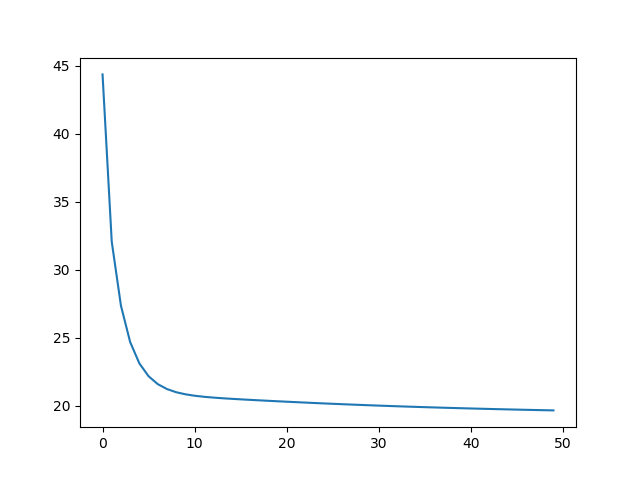

In [15]:
plt.plot(loss_list)